In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [17]:
# 2023년 3월 기준 광주광역시 전기차 충전소 현황 파일을 불러옵니다.

chargernow_df = pd.read_excel('data/충전소+리스트_2023_03_27 광주전체.xlsx')


In [18]:
chargernow_df

,충전소명,운영기관,이용시간,연락처,주소,급속,완속
0,학동현대아파트(입주자 전용),에스에스차저,00:00~23:59,NaN,광주광역시 동구 증심천로89번길 16,0,1
1,용봉아이파크아파트(입주자 전용),에스에스차저,00:00~23:59,NaN,광주광역시 북구 비엔날레로82번길 41,0,1
2,기아 신시청지점,에스에스차저,00:00~23:59,NaN,광주광역시 서구 계수로51번길 4,0,2
3,현대자동차 학동대리점,에스에스차저,00:00~23:59,NaN,광주광역시 동구 남문로 576,1,0
4,수완피오레1단지입주자대표회의(입주민 전용),에스에스차저,00:00~23:59,NaN,광주광역시 광산구 풍영로170번길 39-25,0,3
...,...,...,...,...,...,...,...
730,블루핸즈 하남현대자동차서비스,환경부,24시간 이용가능,1661-9408,광주광역시 광산구 하남대로 127-10,1,0
731,블루핸즈 신창진흥점,환경부,24시간 이용가능,1661-9408,광주광역시 광산구 북문대로 482,1,0
732,롯데마트 수완점,환경부,10:00~23:00,1661-9408,광주광역시 광산구 장신로 98,2,0
733,한국광기술원,환경부,24시간 이용가능,1661-9408,광주광역시 북구 첨단 벤처로 108번길 9,1,0


In [19]:
# 2023년 3월 기준 충전소 현황에서 필요없는 연락처 컬럼을 삭제합니다.

chargernow_df.drop(columns = ['연락처'], inplace = True)

In [20]:
chargernow_df

,충전소명,운영기관,이용시간,주소,급속,완속
0,학동현대아파트(입주자 전용),에스에스차저,00:00~23:59,광주광역시 동구 증심천로89번길 16,0,1
1,용봉아이파크아파트(입주자 전용),에스에스차저,00:00~23:59,광주광역시 북구 비엔날레로82번길 41,0,1
2,기아 신시청지점,에스에스차저,00:00~23:59,광주광역시 서구 계수로51번길 4,0,2
3,현대자동차 학동대리점,에스에스차저,00:00~23:59,광주광역시 동구 남문로 576,1,0
4,수완피오레1단지입주자대표회의(입주민 전용),에스에스차저,00:00~23:59,광주광역시 광산구 풍영로170번길 39-25,0,3
...,...,...,...,...,...,...
730,블루핸즈 하남현대자동차서비스,환경부,24시간 이용가능,광주광역시 광산구 하남대로 127-10,1,0
731,블루핸즈 신창진흥점,환경부,24시간 이용가능,광주광역시 광산구 북문대로 482,1,0
732,롯데마트 수완점,환경부,10:00~23:00,광주광역시 광산구 장신로 98,2,0
733,한국광기술원,환경부,24시간 이용가능,광주광역시 북구 첨단 벤처로 108번길 9,1,0


In [21]:
# 충전량 데이터가 있는 한국전력, 환경부 설치 충전소만 가져오는 작업을 합니다.
# 먼저 한국전력의 데이터를 가져옵니다.

chargekepco_df = chargernow_df[chargernow_df['운영기관'].str.contains('한국전력', na = False)]

In [22]:
# 환경부의 충전소 데이터를 가져옵니다.

chargerngv_df = chargernow_df[chargernow_df['운영기관'].str.contains('환경부', na = False)]

In [23]:
# 한국전력과 환경부의 충전소 데이터를 병합합니다.

chargerkepngv_df = pd.concat([chargekepco_df,chargerngv_df], ignore_index=True)

In [24]:
chargerkepngv_df

,충전소명,운영기관,이용시간,주소,급속,완속
0,광주전남직할(공용),한국전력,평일06시~23시(주말 24시간),"광주광역시 북구 우치로 222 (오치동, 한국전력공사전남지사)",2,2
1,광산지사,한국전력,24시간,"광주광역시 광산구 소촌로 3 (소촌동, 한국전력공사)",2,0
2,하남2지구 중흥S-클래스,한국전력,24시간,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)",1,2
3,수완모아엘가 아파트,한국전력,24시간,"광주광역시 광산구 수완로33번길 76 (수완동, 은빛마을 모아엘가)",0,2
4,EG스위트밸리3차 아파트,한국전력,24시간,"광주광역시 광산구 소촌로152번길 11 (소촌동, 스위트밸리3차아파트)",1,2
...,...,...,...,...,...,...
198,기아자동차 진월점,환경부,24시간 이용가능,광주광역시 남구 진월동 314-1,1,0
199,블루핸즈 하남현대자동차서비스,환경부,24시간 이용가능,광주광역시 광산구 하남대로 127-10,1,0
200,블루핸즈 신창진흥점,환경부,24시간 이용가능,광주광역시 광산구 북문대로 482,1,0
201,롯데마트 수완점,환경부,10:00~23:00,광주광역시 광산구 장신로 98,2,0


In [25]:
# 주소 중복되어 있는 곳을 제거합니다.

chargerkepngv_dd_df = chargerkepngv_df.drop_duplicates()

In [26]:
chargerkepngv_dd_df

,충전소명,운영기관,이용시간,주소,급속,완속
0,광주전남직할(공용),한국전력,평일06시~23시(주말 24시간),"광주광역시 북구 우치로 222 (오치동, 한국전력공사전남지사)",2,2
1,광산지사,한국전력,24시간,"광주광역시 광산구 소촌로 3 (소촌동, 한국전력공사)",2,0
2,하남2지구 중흥S-클래스,한국전력,24시간,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)",1,2
3,수완모아엘가 아파트,한국전력,24시간,"광주광역시 광산구 수완로33번길 76 (수완동, 은빛마을 모아엘가)",0,2
4,EG스위트밸리3차 아파트,한국전력,24시간,"광주광역시 광산구 소촌로152번길 11 (소촌동, 스위트밸리3차아파트)",1,2
...,...,...,...,...,...,...
198,기아자동차 진월점,환경부,24시간 이용가능,광주광역시 남구 진월동 314-1,1,0
199,블루핸즈 하남현대자동차서비스,환경부,24시간 이용가능,광주광역시 광산구 하남대로 127-10,1,0
200,블루핸즈 신창진흥점,환경부,24시간 이용가능,광주광역시 광산구 북문대로 482,1,0
201,롯데마트 수완점,환경부,10:00~23:00,광주광역시 광산구 장신로 98,2,0


In [27]:
# 2023년도 현재 광주광역시 충전기 급속, 완속 개별 갯수의 합을 구합니다. (한국전력, 환경부 설치)

countchargerkepngv_df = chargerkepngv_dd_df[['급속','완속']].sum()

In [28]:
countchargerkepngv_df

급속    244
완속    117
dtype: int64

In [30]:
# 2023년도 현재 광주광역시 충전기 총합을 구합니다.

countchargerkepngvs_df = countchargerkepngv_df.sum()

In [33]:
countchargerkepngvs_df

361

(array([0, 1]), [Text(0, 0, '급속'), Text(1, 0, '완속')])

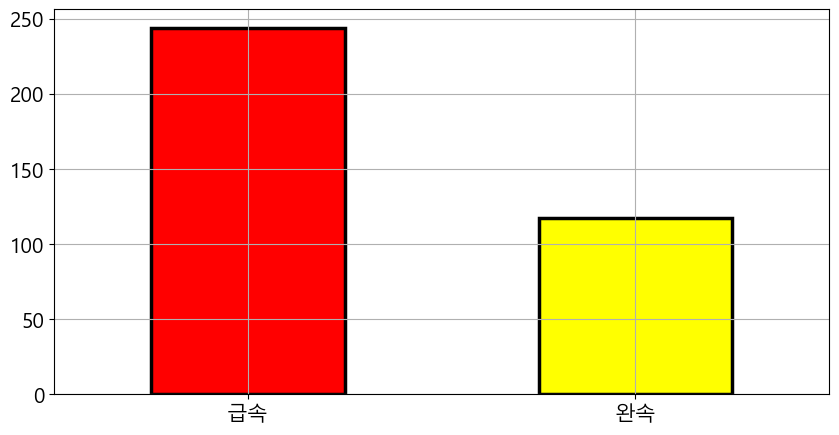

In [34]:
# 2023년도 현재 충전기 총 갯수 시각화
countchargerkepngv_df.plot.bar(grid=True, color = ['red', 'yellow'], edgecolor = 'black', linewidth = 2.5, figsize=(10,5), fontsize=15)
plt.xticks(rotation = 360)

In [35]:
# 2023년 광주광역시 충전기 비율
np.round(countchargerkepngv_df.div(countchargerkepngvs_df), 2)

급속    0.68
완속    0.32
dtype: float64

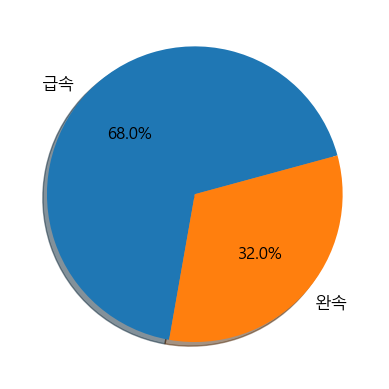

In [36]:
ratio = [68, 32]
labels = ['급속', '완속']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, shadow=True)
plt.show()